# minimal PyTorch autoencoder
- that encodes $[x^2, x, x/2]$ into $[x]$ and decodes it into $[x^2, x, x/2]$

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate training data
x_vals = torch.linspace(0.1, 2, 100).unsqueeze(1)
input_data = torch.cat([x_vals**2, x_vals, x_vals/2], dim=1)
target_data = torch.cat([x_vals**2, x_vals, x_vals/2], dim=1)

print(input_data.shape)
print(target_data.shape)

print(input_data[0: 5])
print(target_data[0: 5])

torch.Size([100, 3])
torch.Size([100, 3])
tensor([[0.0100, 0.1000, 0.0500],
        [0.0142, 0.1192, 0.0596],
        [0.0192, 0.1384, 0.0692],
        [0.0248, 0.1576, 0.0788],
        [0.0312, 0.1768, 0.0884]])
tensor([[0.0100, 0.1000, 0.0500],
        [0.0142, 0.1192, 0.0596],
        [0.0192, 0.1384, 0.0692],
        [0.0248, 0.1576, 0.0788],
        [0.0312, 0.1768, 0.0884]])


In [5]:
# Define the autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 1)
        )
        self.decoder = nn.Sequential(
            nn.Linear(1, 3)
        )

    def forward(self, x): # type: ignore
        code = self.encoder(x)
        out = self.decoder(code)
        return out

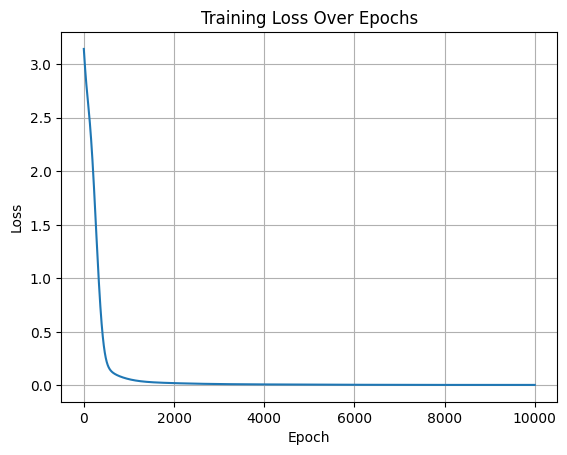

In [19]:
import matplotlib.pyplot as plt

losses = []

# Training
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10000):
    optimizer.zero_grad()
    output = model(input_data)
    loss = criterion(output, target_data)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

In [20]:
# Test
test_x = torch.tensor([[1.5]])
test_input = torch.cat([test_x**2, test_x, test_x/2], dim=1)
predicted = model(test_input)
print("test_input:", test_input)
print("Predicted:", predicted)

test_input: tensor([[2.2500, 1.5000, 0.7500]])
Predicted: tensor([[2.2802, 1.4473, 0.7236]], grad_fn=<AddmmBackward0>)
